#Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Directory

In [2]:
cd /content/gdrive/MyDrive/kelompok 3 ai

/content/gdrive/MyDrive/kelompok 3 ai


#Masukan library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 


#Baca dan Cek Dataset

In [4]:
data_frame = pd.read_csv("diabetes.csv")
data_frame.shape


(768, 9)

In [5]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data_frame.tail(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
763,10,101,76,48,180,32.9,171.00,63,0
764,2,122,70,27,0,36.8,0.34,27,0
765,5,121,72,23,112,26.2,245.00,30,0
766,1,126,60,0,0,30.1,349.00,47,1
767,1,93,70,31,0,30.4,315.00,23,0


#Cek Data Value Kosong atau tidak

In [7]:
print (data_frame.isnull().values.any())


False


#Cek Kolerasi Fitur

In [8]:
def korelasi_plot(data_frame):
    corr = data_frame.corr()
    fig, ax = plt.subplots(figsize=(13, 13))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)


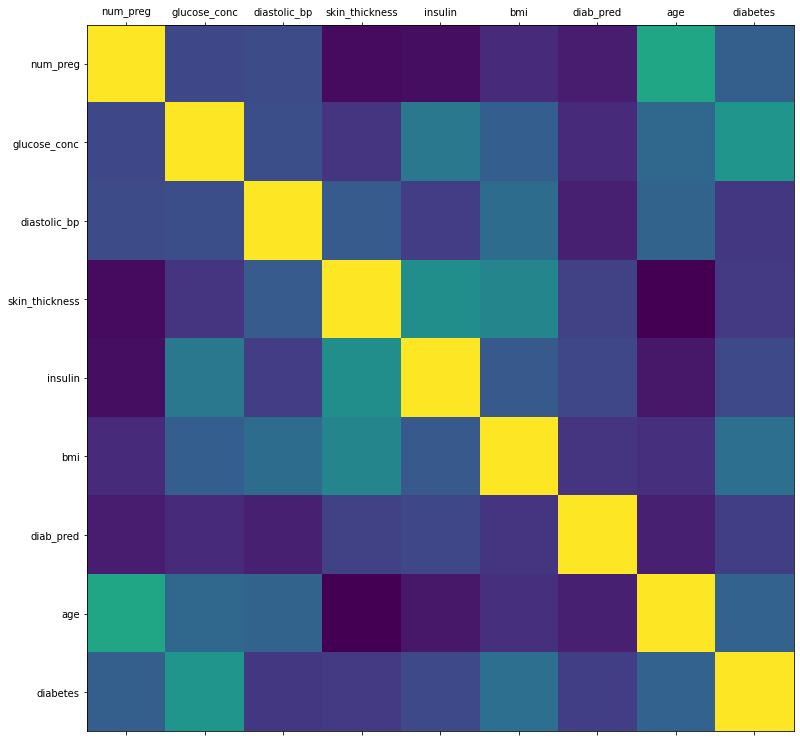

In [9]:

korelasi_plot(data_frame)

In [10]:
data_frame.corr()

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.027129,0.544341,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.019326,0.263514,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,-0.014605,0.239528,0.065068
skin_thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.103279,-0.113970,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.122250,-0.042163,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.055877,0.036242,0.292695
diab_pred,-0.027129,0.019326,-0.014605,0.103279,0.122250,0.055877,1.000000,-0.016418,0.092093
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,-0.016418,1.000000,0.238356
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.092093,0.238356,1.000000


In [11]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
obs = len(data_frame)
true = len(data_frame.loc[data_frame['diabetes'] == 1])
false = len(data_frame.loc[data_frame['diabetes'] == 0])
print("Persentase Orang Diabetes :  {0} ({1:2.2f}%)".format(true, ((1.0 * true)/(1.0 * obs)) * 100))
print("Persentase Orang Tidak Diabetes: {0} ({1:2.2f}%)".format(false, ((1.0 * false)/(1.0 * obs)) * 100))


Persentase Orang Diabetes :  268 (34.90%)
Persentase Orang Tidak Diabetes: 500 (65.10%)


#Split Data/Memisahkan Data

In [13]:
from sklearn.model_selection import train_test_split

nama_fitur = ['num_preg', 'glucose_conc', 'diastolic_bp', 'skin_thickness', 'insulin', 'bmi', 'diab_pred', 'age']
prediksi = ['diabetes']

X = data_frame[nama_fitur].values
y = data_frame[prediksi].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)


In [14]:
train_value = (1.0 * len(X_train)) / (1.0 * len(data_frame.index))
test_value = (1.0 * len(X_test)) / (1.0 * len(data_frame.index))
print("{0:0.2f}% pada set training".format(train_value * 100))
print("{0:0.2f}% pada set test".format(test_value * 100))

69.92% pada set training
30.08% pada set test


In [15]:
print("Original True  : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 1]), (len(data_frame.loc[data_frame['diabetes'] == 1])/len(data_frame.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(data_frame.loc[data_frame['diabetes'] == 0]), (len(data_frame.loc[data_frame['diabetes'] == 0])/len(data_frame.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))


Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 197 (36.69%)
Training False : 340 (63.31%)

Test True      : 71 (30.74%)
Test False     : 160 (69.26%)


#Data setelah split data

In [16]:
data_frame.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,627.000,50,1
1,1,85,66,29,0,26.6,351.000,31,0
2,8,183,64,0,0,23.3,672.000,32,1
3,1,89,66,23,94,28.1,167.000,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
print("Baris yang ada di dataframe {0}".format(len(data_frame)))
print("Baris yang mempunyai nilai 0 di glucose_conc: {0}".format(len(data_frame.loc[data_frame['glucose_conc'] == 0])))
print("Baris yang mempunyai nilai 0 di diastolic_bp: {0}".format(len(data_frame.loc[data_frame['diastolic_bp'] == 0])))
print("Baris yang mempunyai nilai 0 di skin_thickness: {0}".format(len(data_frame.loc[data_frame['skin_thickness'] == 0])))
print("Baris yang mempunyai nilai 0 di insulin: {0}".format(len(data_frame.loc[data_frame['insulin'] == 0])))
print("Baris yang mempunyai nilai 0 di bmi: {0}".format(len(data_frame.loc[data_frame['bmi'] == 0])))
print("Baris yang mempunyai nilai 0 di diab_pred: {0}".format(len(data_frame.loc[data_frame['diab_pred'] == 0])))
print("Baris yang mempunyai nilai 0 di age: {0}".format(len(data_frame.loc[data_frame['age'] == 0])))


Baris yang ada di dataframe 768
Baris yang mempunyai nilai 0 di glucose_conc: 5
Baris yang mempunyai nilai 0 di diastolic_bp: 35
Baris yang mempunyai nilai 0 di skin_thickness: 227
Baris yang mempunyai nilai 0 di insulin: 374
Baris yang mempunyai nilai 0 di bmi: 11
Baris yang mempunyai nilai 0 di diab_pred: 0
Baris yang mempunyai nilai 0 di age: 0


In [18]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)


In [19]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1, random_state=0)

svm.fit(X_train, y_train.ravel())

SVC(C=1, kernel='linear', random_state=0)

In [20]:
# mengembalikan array ke hasil prediksi
prediksidata = svm.predict(X_train)



In [21]:
from sklearn import metrics

akurasi_train = metrics.accuracy_score(y_train, prediksidata)

print ("Akurasi train : {0:.4f}".format(akurasi_train))

Akurasi train : 0.7561


In [22]:
prediksi_svm = svm.predict(X_test)

akurasi_test = metrics.accuracy_score(y_test, prediksi_svm)

print ("Akurasi tes : {0:.4f}".format(akurasi_test))


Akurasi tes : 0.7922


In [23]:
print ("Confusion Matrix untuk Support Vector Machine")
# Label di set ke 1=True untuk kiri atas dan 0=false untuk kanan bawah
print ("{0}".format(metrics.confusion_matrix(y_test, prediksi_svm, labels=[1, 0])))


Confusion Matrix untuk Support Vector Machine
[[ 47  24]
 [ 24 136]]


In [24]:
print ("Laporan Klasifikasi\n")
# Label di set ke 1=True untuk kiri atas dan 0=false untuk kanan bawah
print ("{0}".format(metrics.classification_report(y_test, prediksi_svm, labels=[1, 0])))

Laporan Klasifikasi

              precision    recall  f1-score   support

           1       0.66      0.66      0.66        71
           0       0.85      0.85      0.85       160

    accuracy                           0.79       231
   macro avg       0.76      0.76      0.76       231
weighted avg       0.79      0.79      0.79       231

